# Practice Notebook: Learning SimpleITK

Import the SimpleITK module

In [1]:
import SimpleITK as sitk

Read the image in its native format (nii.gz)

In [20]:
image = sitk.ReadImage( '/local-scratch/cedar-rm/scratch/asa224/Datasets/BRATS2017/Training/HGG/Brats17_2013_10_1/Brats17_2013_10_1_flair.nii.gz' )

Get some of the properties of the scan

In [3]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

(240, 240, 155)
(0.0, -239.0, 0.0)
(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


In [4]:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

240
240
155


In [5]:
print(image.GetDimension())
print(image.GetPixelIDValue())
print(image.GetPixelIDTypeAsString())

3
2
16-bit signed integer


Convert the SITK Image object into a simple numpy array for processing and viewing

In [6]:
nda = sitk.GetArrayViewFromImage(image)

In ITK, images are (x,y,z), but in Numpy, they are (z,y,x). 

In [7]:
nda.shape

(155, 240, 240)

This should open up ImageJ, but it doesn't at the moment. Need to fix this. 

In [ ]:
sitk.Show(image, debugOn=True)

View the opened volume using matplotlib

In [8]:
import matplotlib.pyplot as plt

In [21]:
npa = sitk.GetArrayViewFromImage(image)

# Display the image slice from the middle of the stack, z axis
z = int(image.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(image)[z,:,:]

# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure()
fig.set_size_inches(15,30)

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)
plt.title('default colormap')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r);
plt.title('grey colormap')
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values')
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis('off')

(-0.5, 239.5, 239.5, -0.5)

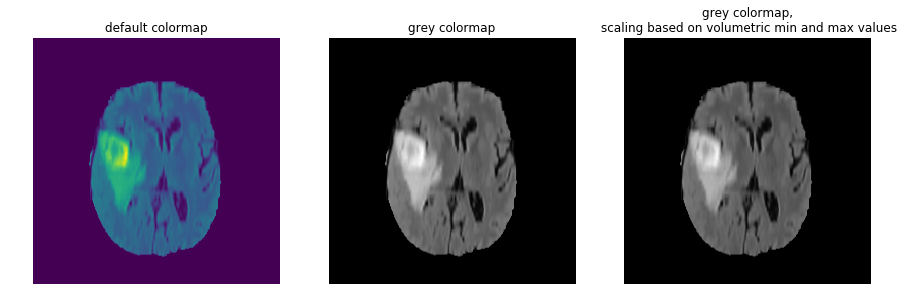

In [22]:
plt.show()

In [23]:
maskImage = sitk.OtsuThreshold(image, 0, 1, 200 )
image = sitk.Cast( image, sitk.sitkFloat32 )
corrector = sitk.N4BiasFieldCorrectionImageFilter();
numberFilltingLevels = 4
corrector.SetMaximumNumberOfIterations( [ 4 ] *numberFilltingLevels  )
output = corrector.Execute( image, maskImage )

# View bias field corrected image

In [24]:
import numpy as np

In [25]:
nda_in = sitk.GetArrayViewFromImage(image)
nda_in = np.swapaxes(nda_in, 0, 1)
nda_in = np.swapaxes(nda_in, 1, 2)

nda_out = sitk.GetArrayViewFromImage(output)
nda_out = np.swapaxes(nda_out, 0, 1)
nda_out = np.swapaxes(nda_out, 1, 2)

print('types of in and out numpy arrays: {} and {}'.format(nda_in.dtype, nda_out.dtype))

nda_diff = nda_out - nda_in

types of in and out numpy arrays: float32 and float32


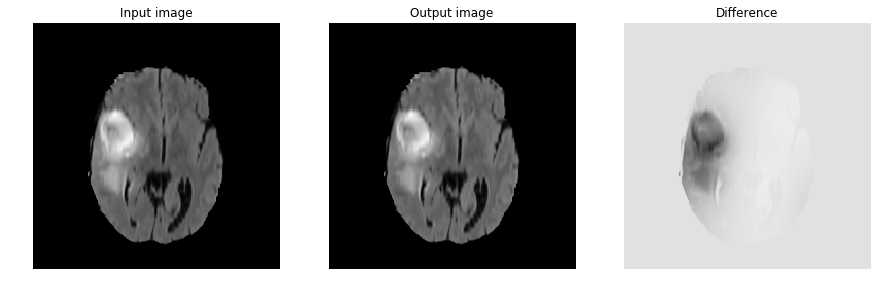

In [26]:
z = 70
fig = plt.figure()
fig.set_size_inches(15,30)
fig.add_subplot(1,3,1)

plt.title('Input image')
plt.imshow(nda_in[:,:, z],cmap=plt.cm.Greys_r, vmin=nda_in.min(), vmax=nda_in.max())
plt.axis('off')

fig.add_subplot(1,3,2)
plt.title('Output image')
plt.imshow(nda_out[:,:, z],cmap=plt.cm.Greys_r, vmin=nda_out.min(), vmax=nda_out.max())
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('Difference')
plt.imshow(nda_diff[:,:, z],cmap=plt.cm.Greys_r, vmin=nda_diff.min(), vmax=nda_diff.max())
plt.axis('off')

plt.show()

In [28]:
nda_in.max()

1273.0

In [29]:
nda_out.max()

1165.7495

There's no point in converting back to float32. Don't do it. 

In [31]:
nda_out.astype(np.int16).max()

1165